KAGGLE TITANIC COMPETITION

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Load the dataset
data = pandas.read_csv('train.csv')
# View the first few rows of the dataset
data.head()
# Check the shape of the dataset
data.shape
#length = len(data)
#print(length)
# Get Information about the dataset
#data.info()
# Get statistical summary 
data.describe()
# Get missing values
data.isnull().sum()
# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()
# impute missing values
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
# Drop cabin missing values.
data = data.drop('Cabin', axis=1)
missing_values = data.isnull().sum()
print(missing_values)

# Handling categorical data
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Pclass']=le.fit_transform(data['Pclass'])
# One hot encoding for embarked-nominal variable
embarked = pandas.get_dummies(data['Embarked'], prefix='Embarked')
data = pandas.concat([data, embarked], axis=1)
data.info()



Feature Analysis
Feature analysis is a crucial step in the machine learning pipeline. It involves analyzing and understanding the characteristics of each feature
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int32(1), int64(5), object(3)



In [ ]:
# Categorical features - Analyse each feature in relation to the target "Survived"
# Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.show()

# Sex
sns.countplot(x='Sex',hue='Survived', data=data)
plt.show()

# Embarked
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.show()

# Numerical features 
# Age
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()

# Fare
sns.histplot(data=data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.show()



Correlation between categorical and Numerical features

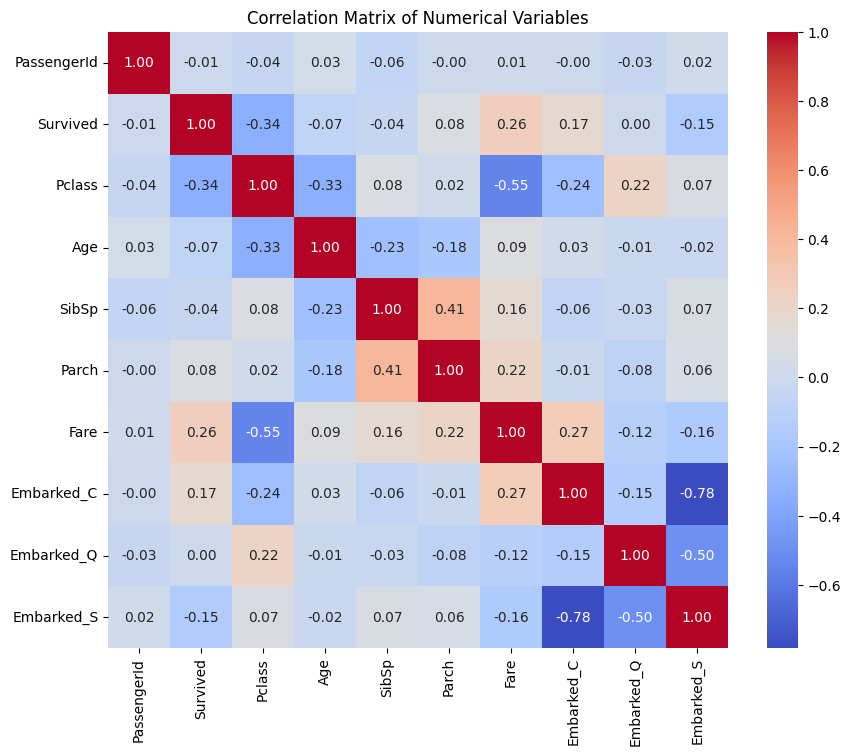

In [16]:
# correlation between categorical and Numerical features.
# Correlation matrix
# Step 1: Select numerical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64','bool']).columns

# Step 2: Compute correlation matrix
corr_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()